# Abstract

## This notebook includes: a sample of clean and dirty data, heart rate analysis with noise removal (optional), Bayevsky stress index, prediction of ECG signal behavior

# Heartbeat data analysis and plots

## primarilly we need to import our librarys and set the require frequency

In [15]:
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample


sample_rate = 300

# Prepare for analysis

## The first step is collect data and create dataframe for analysis

In [16]:
cleardata = hp.get_data('e0110.csv')
dirtydata = hp.get_data('118e24.csv')
annotations = hp.get_data('118e24_ann.csv')

## In this experiment we took the respondents ECG data recovered over 40 minutes

## now let's look at our data at different points in time

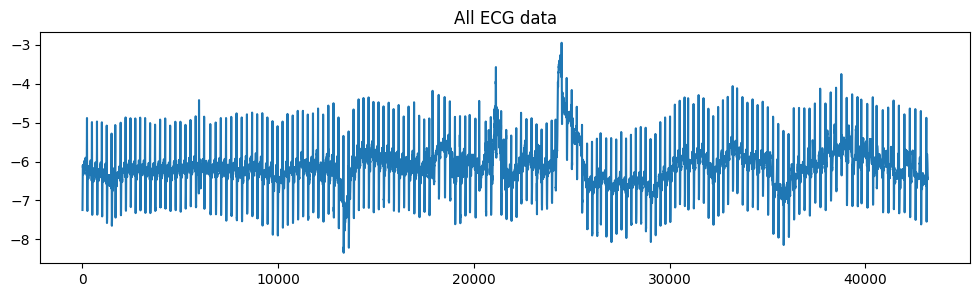

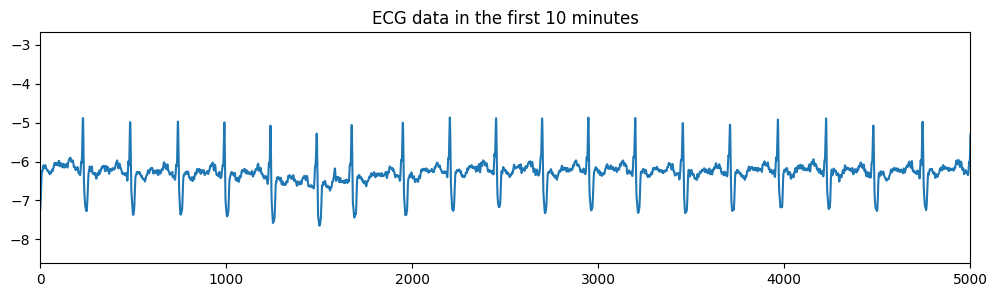

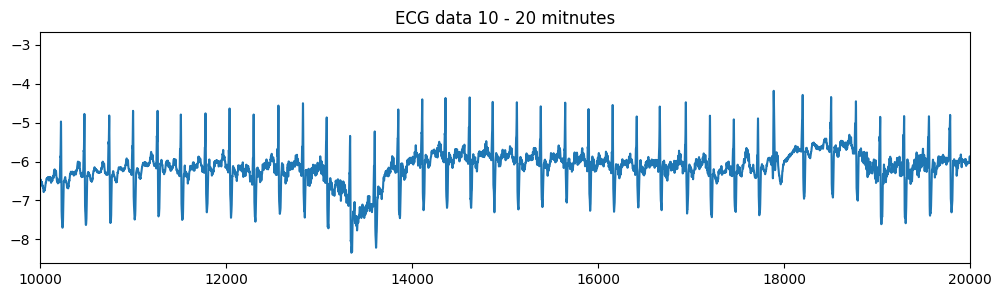

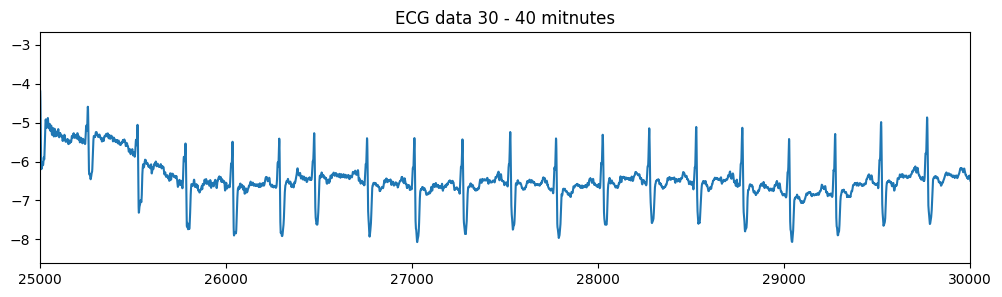

In [17]:
plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.title('All ECG data')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(0, 5000)
plt.title('ECG data in the first 10 minutes')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(10000, 20000)
plt.title('ECG data 10 - 20 mitnutes')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(25000, 30000)
plt.title('ECG data 30 - 40 mitnutes')
plt.show()

# Analysis 

## The second step involves analysing the data obtaint

## First we have to filter the signal and get rid of noise using SciPy library

## Second step ivolves finding R peaks

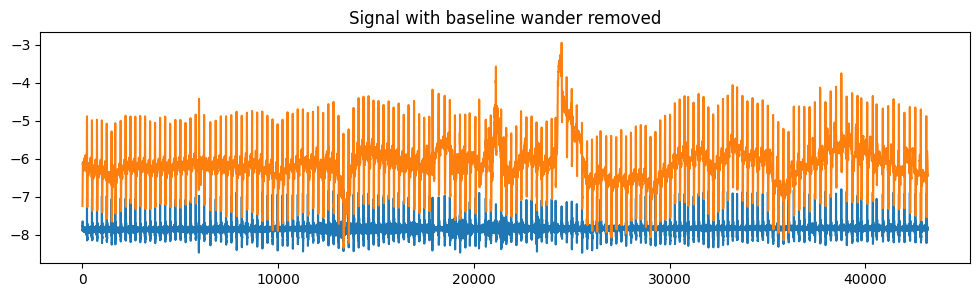

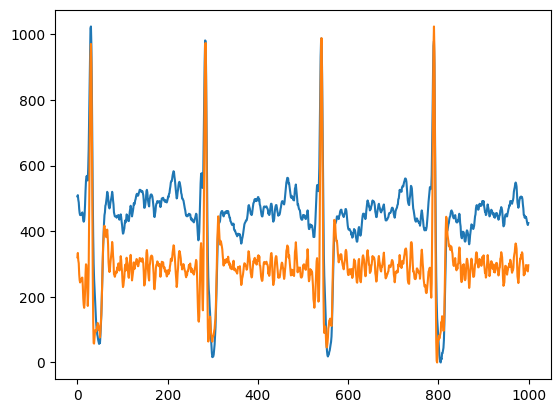

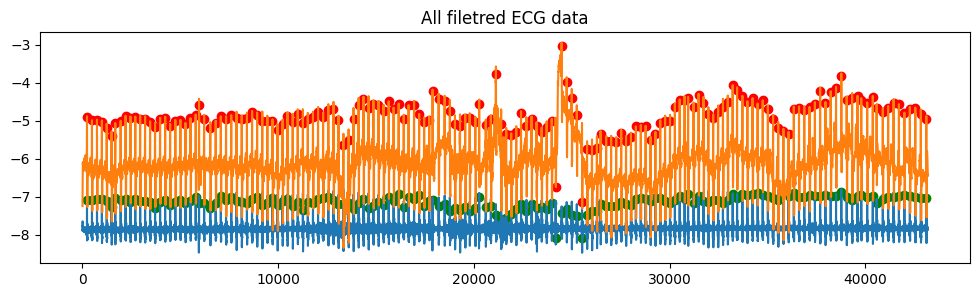

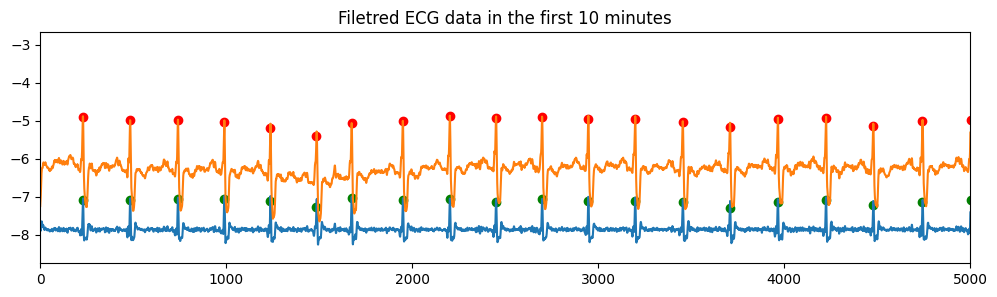

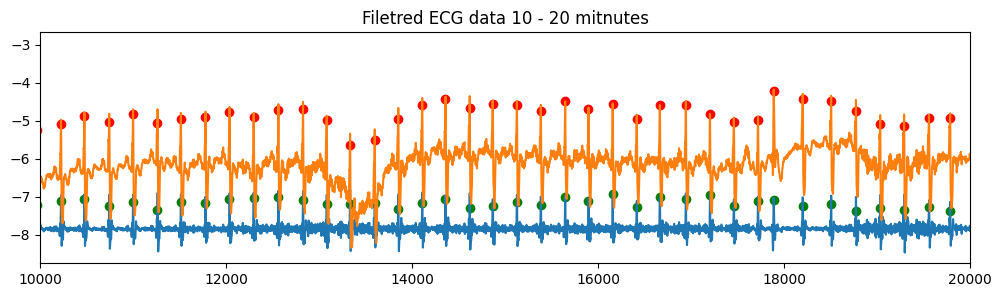

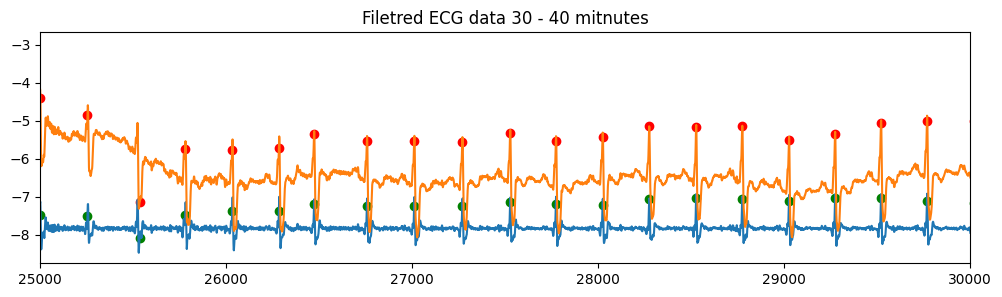

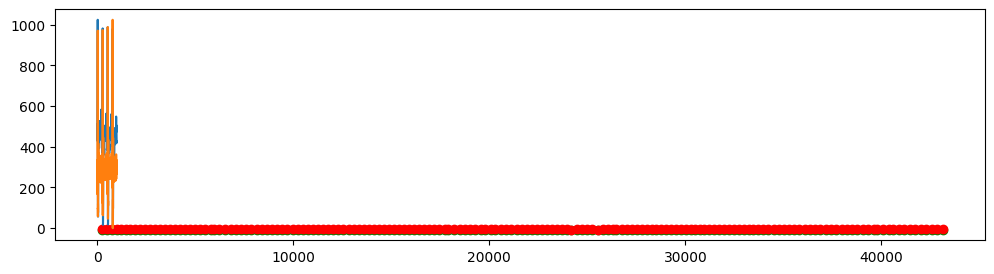

In [18]:
filtered = hp.remove_baseline_wander(dirtydata, sample_rate)

plt.figure(figsize=(12,3))
plt.title('Signal with baseline wander removed')
plt.plot(filtered)
plt.plot(dirtydata)
plt.show()

plt.plot(hp.scale_data(dirtydata[200:1200]))
plt.plot(hp.scale_data(filtered[200:1200]))
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.title('All filetred ECG data')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(0, 5000)
plt.title('Filetred ECG data in the first 10 minutes')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(10000, 20000)
plt.title('Filetred ECG data 10 - 20 mitnutes')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(25000, 30000)
plt.title('Filetred ECG data 30 - 40 mitnutes')
plt.show()


plt.figure(figsize=(12,3))
plt.plot(hp.scale_data(dirtydata[200:1200]))
plt.plot(hp.scale_data(filtered[200:1200]))
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.show()

# R-R measure

## Now we need to count the xlim positions of R peaks and determine the distance between them.

## Last step - create Poincare plot

[2530. 2570. 2500. 2480. 2480. 1880. 2760. 2520. 2490. 2470. 2490. 2520.
 2560. 2530. 2580. 2590. 2540. 2650. 2590. 2590. 2560. 2650. 1710. 2610.
 3150. 2760. 2620. 2670. 2660. 2700. 2650. 2660. 2640. 2580. 2630. 2590.
 2630. 2570. 2570. 2520. 2670. 2560. 2560.   80. 2500. 2650. 2590. 2590.
 2660. 2640. 2550. 2520.   20. 2630. 2530. 2580. 2500.   20. 2580. 2470.
 2600. 2570. 2620. 2520. 2590. 2590. 2480. 2800. 2590. 2570. 2600. 1690.
 3110. 3060. 2670. 2610. 2480.   90.   20. 2650. 2280. 2910. 1940. 3350.
 2600. 2600.   20. 2660. 2590. 5130. 2440. 2750. 2630. 2530. 2600. 2580.
 2580. 2000. 3060.   10. 2600. 2580. 2570. 2670. 5100. 2510. 1880. 2840.
 2550. 2580. 2570. 2460. 2510. 2500. 2530. 2480. 2510. 2480. 2470. 2470.
 2520. 2480. 2470. 2490. 1810. 2780. 2580. 2500. 2480. 2470. 2520. 2470.
 2450. 2510. 2250. 2730. 2550. 2630. 2590. 2600. 2630. 2670. 2620. 2660.
 2640. 2670. 2660. 2700. 2690. 2730. 2690. 2700. 2690. 2720. 2700. 2740.
 2780. 2750. 1920. 3040. 2850. 1950. 3160. 2740. 27

C:\Users\Лоренсо\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[230, 483, 740, 990, 1238, 1486, 1674, 1950, 2202, 2451, 2698, 2947, 3199, 3455, 3708, 3966, 4225, 4479, 4744, 5003, 5262, 5518, 5783, 5954, 6215, 6530, 6806, 7068, 7335, 7601, 7871, 8136, 8402, 8666, 8924, 9187, 9446, 9709, 9966, 10223, 10475, 10742, 10998, 11254, 11262, 11512, 11777, 12036, 12295, 12561, 12825, 13080, 13332, 13334, 13597, 13850, 14108, 14358, 14360, 14618, 14865, 15125, 15382, 15644, 15896, 16155, 16414, 16662, 16942, 17201, 17458, 17718, 17887, 18198, 18504, 18771, 19032, 19280, 19289, 19291, 19556, 19784, 20075, 20269, 20604, 20864, 21124, 21126, 21392, 21651, 22164, 22408, 22683, 22946, 23199, 23459, 23717, 23975, 24175, 24481, 24482, 24742, 25000, 25257, 25524, 26034, 26285, 26473, 26757, 27012, 27270, 27527, 27773, 28024, 28274, 28527, 28775, 29026, 29274, 29521, 29768, 30020, 30268, 30515, 30764, 30945, 31223, 31481, 31731, 31979, 32226, 32478, 32725, 32970, 33221, 33446, 33719, 33974, 34237, 34496, 34756, 35019, 35286, 35548, 35814, 36078, 36345, 36611, 36881,

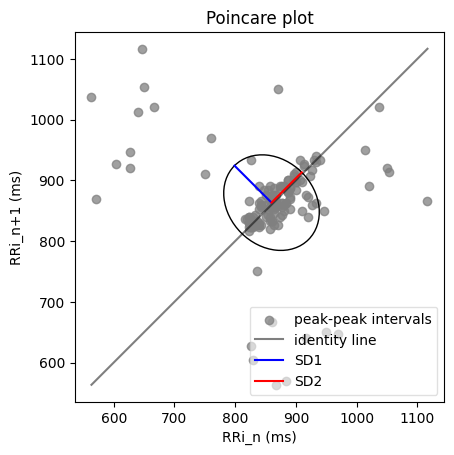

In [20]:
wd, m = hp.process(dirtydata, 300.0)


peaklist = wd['peaklist']
wd = hp.analysis.calc_rr(peaklist, sample_rate = 100.0)
rrlist = wd['RR_list']
print(rrlist)

wd, m = hp.process(dirtydata, 300.0)
hp.plot_poincare(wd, m)
print(peaklist)

# Baevsky stress index

## Baevsky stress index formula
## sress_score = AMo / (2 * VR * Mo)
## R-R interval - the time delay between consecutive heartbeats (assumed to be the inverse value of the bpm)## 
Mo - mode - most frequent R-R interval value## 
AMo - mode amplitude - % of the intervals corresponding to Mod## e
VR - variational range - the difference between min and max R-R intervals